In [ ]:
import kagglehub

In [ ]:
# Download latest version
path = kagglehub.dataset_download("colewelkins/cardiovascular-disease")

print("Path to dataset files:", path)

In [216]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [217]:
file_path = r"C:\Users\Trisha Chakraborty\.cache\kagglehub\datasets\colewelkins\cardiovascular-disease\versions\1\cardio_data_processed.csv"


In [218]:
# Load the dataset
df = pd.read_csv(file_path)

In [219]:
df.head

<bound method NDFrame.head of           id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
68200  99993  19240       2     168    76.0    120     80            1     1   
68201  99995  22601       1     158   126.0    140     90            2     2   
68202  99996  19066       2     183   105.0    180     90            3     1   
68203  99998  22431       1     163    72.0    135     80            1     2   
68204  99999  20540       1     170    72.0    120     80            2     1   

       sm

In [220]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Trisha Chakraborty\AppData\Local\Temp\ipykernel_17900\1247982538.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels(), rotation=45, ha='right')


<Figure size 2000x2000 with 0 Axes>

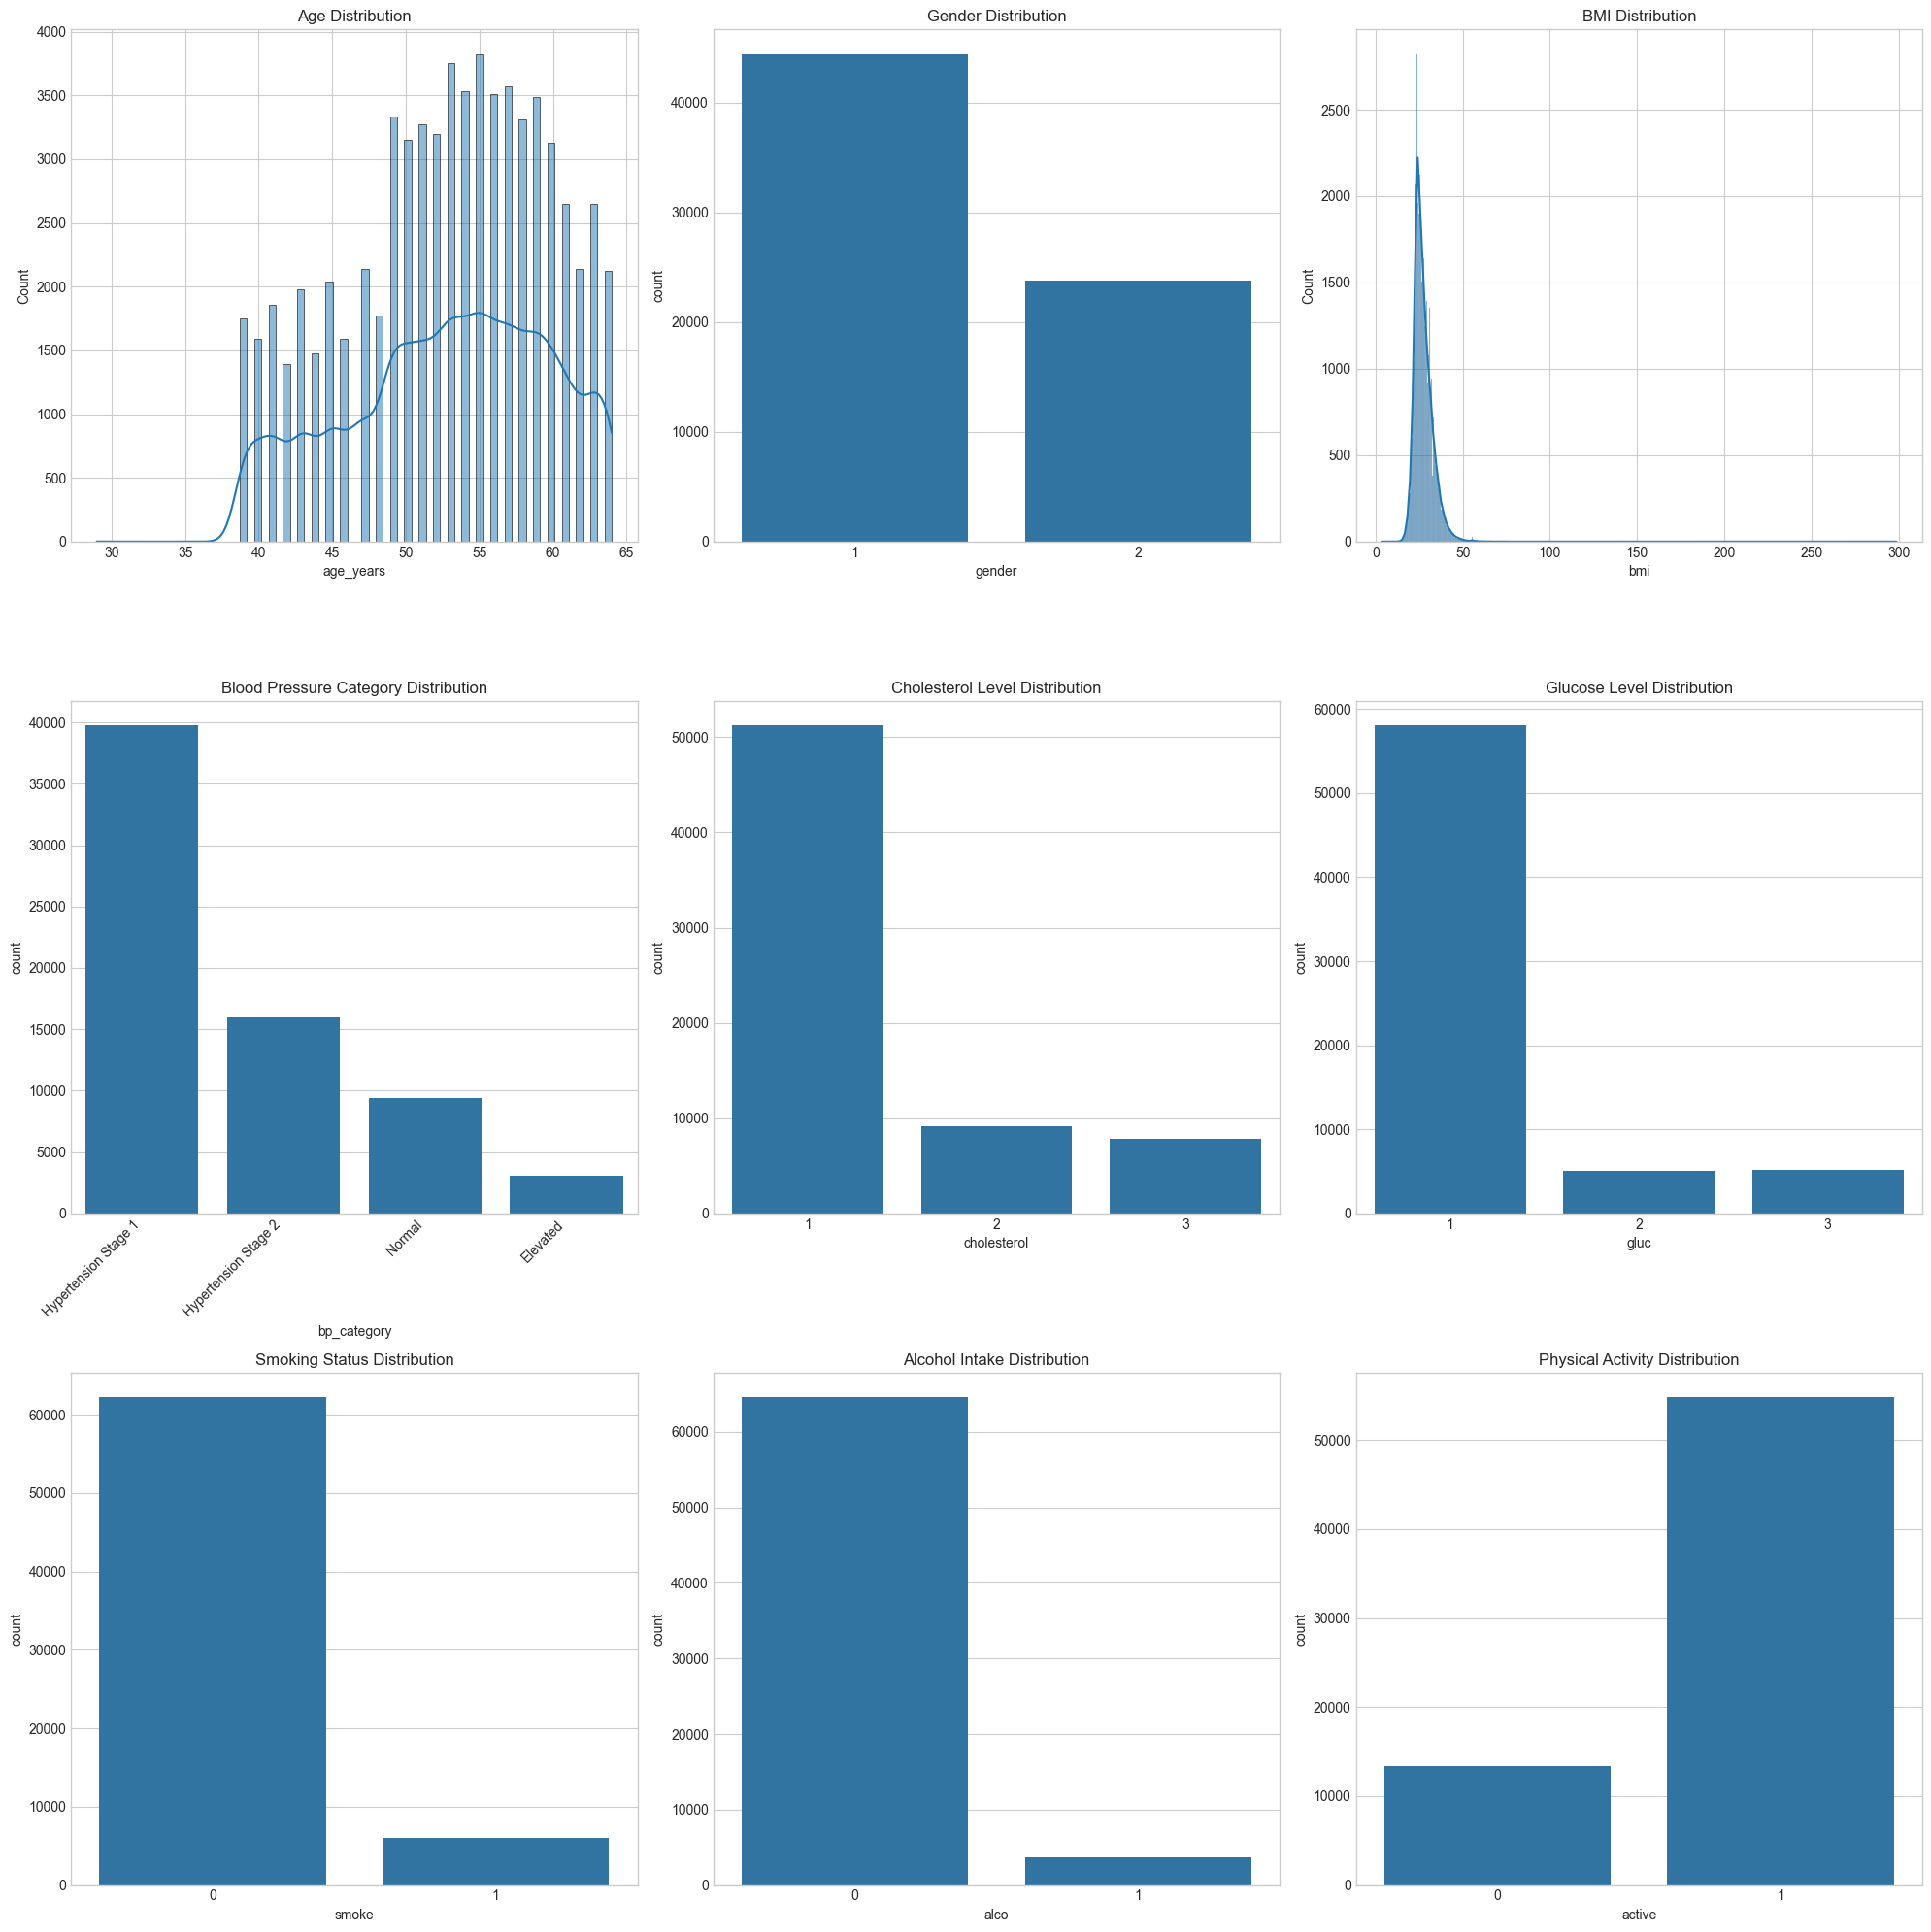

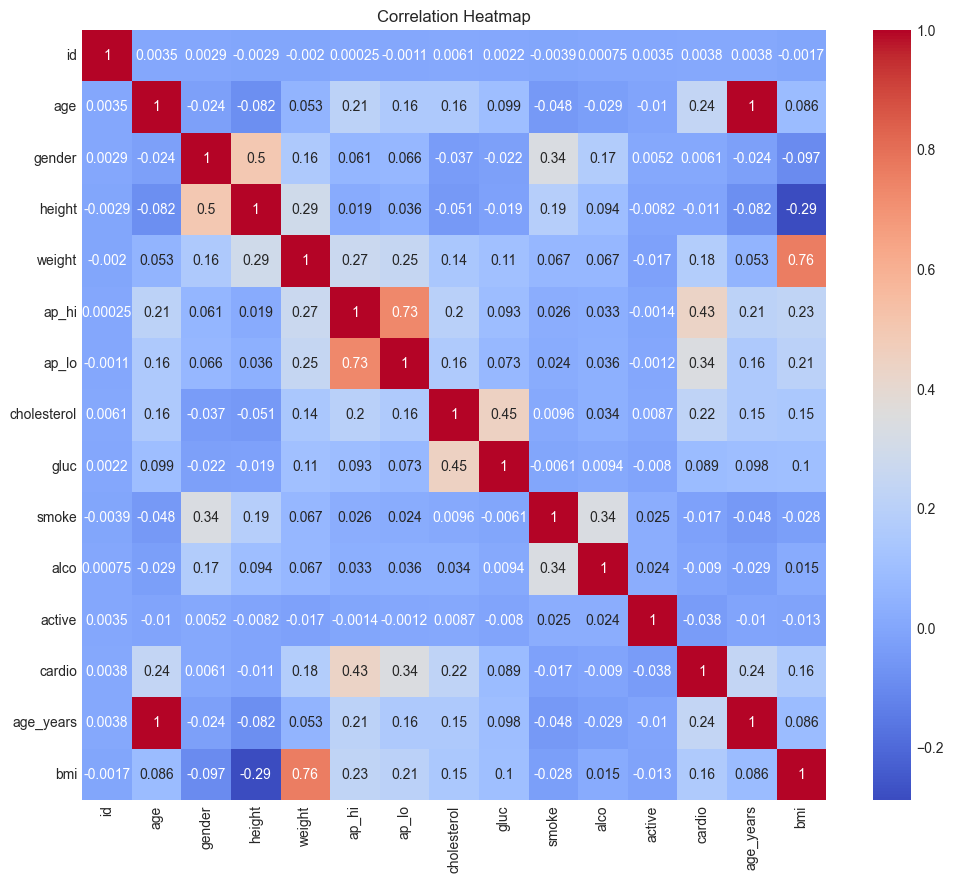

In [221]:
# Set up the plot style
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(20, 20))

# Create subplots for different visualizations
fig, axs = plt.subplots(3, 3, figsize=(20, 20))

# 1. Age distribution
sns.histplot(data=df, x='age_years', kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Age Distribution')

# 2. Gender distribution
sns.countplot(data=df, x='gender', ax=axs[0, 1])
axs[0, 1].set_title('Gender Distribution')

# 3. BMI distribution
sns.histplot(data=df, x='bmi', kde=True, ax=axs[0, 2])
axs[0, 2].set_title('BMI Distribution')

# 4. Blood Pressure Category distribution
sns.countplot(data=df, x='bp_category', ax=axs[1, 0])
axs[1, 0].set_title('Blood Pressure Category Distribution')
axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels(), rotation=45, ha='right')

# 5. Cholesterol level distribution
sns.countplot(data=df, x='cholesterol', ax=axs[1, 1])
axs[1, 1].set_title('Cholesterol Level Distribution')

# 6. Glucose level distribution
sns.countplot(data=df, x='gluc', ax=axs[1, 2])
axs[1, 2].set_title('Glucose Level Distribution')

# 7. Smoking status distribution
sns.countplot(data=df, x='smoke', ax=axs[2, 0])
axs[2, 0].set_title('Smoking Status Distribution')

# 8. Alcohol intake distribution
sns.countplot(data=df, x='alco', ax=axs[2, 1])
axs[2, 1].set_title('Alcohol Intake Distribution')

# 9. Physical activity distribution
sns.countplot(data=df, x='active', ax=axs[2, 2])
axs[2, 2].set_title('Physical Activity Distribution')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

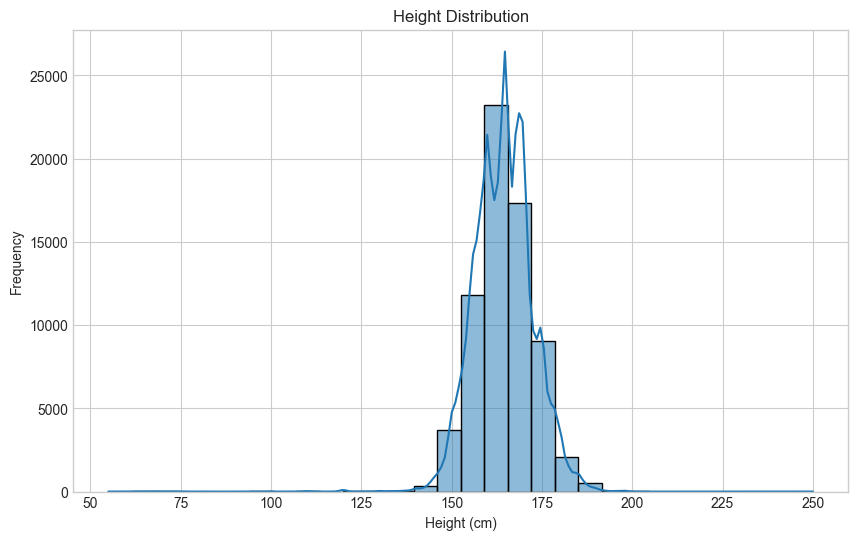

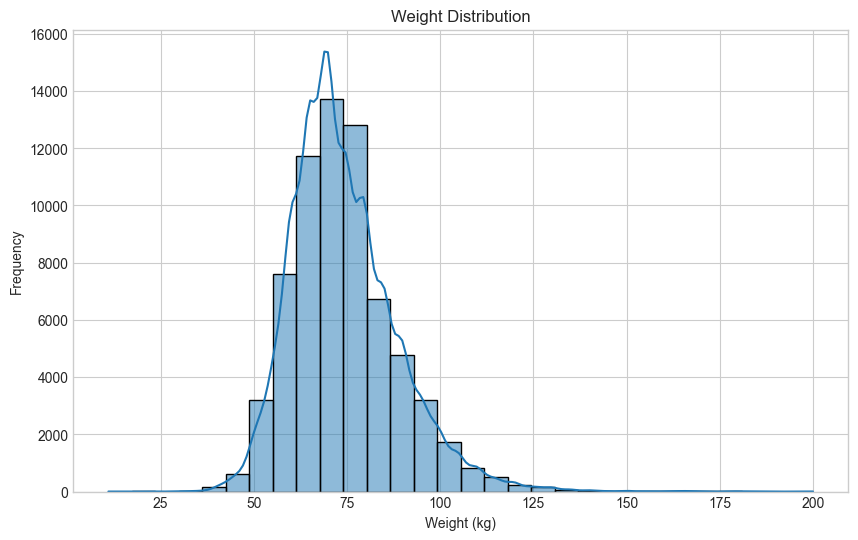

In [222]:
# Plot Height Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='height', kde=True, bins=30)
plt.title('Height Distribution')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.show()

# Plot Weight Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='weight', kde=True, bins=30)
plt.title('Weight Distribution')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.show()

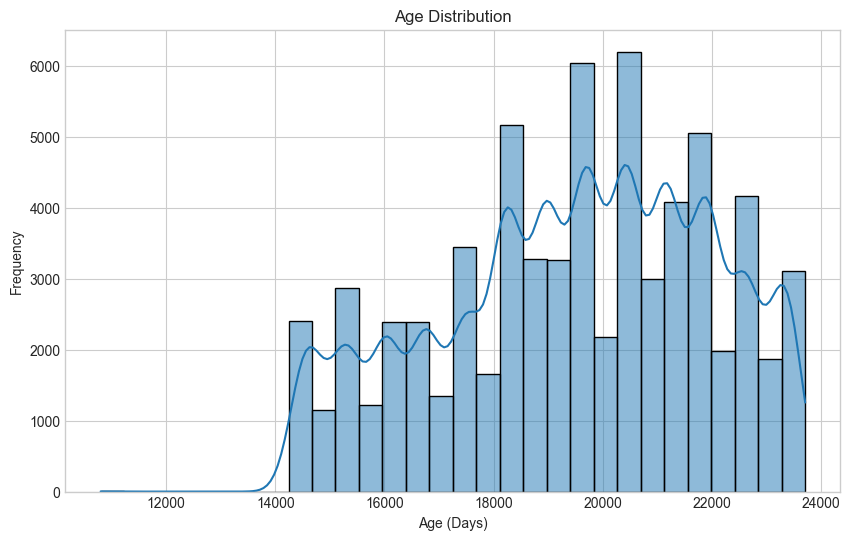

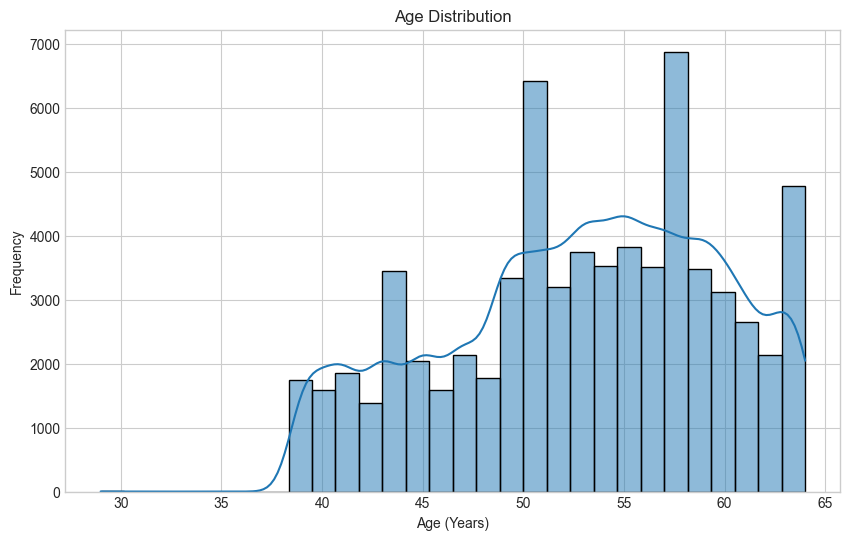

In [223]:
# Plot Age in Days Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age (Days)')
plt.ylabel('Frequency')
plt.show()

# Plot Age in Years Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age_years', kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age (Years)')
plt.ylabel('Frequency')
plt.show()

In [224]:
# Define thresholds for extreme height and weight
min_height = 100  # Minimum plausible height in cm
max_height = 200  # Maximum plausible height in cm
min_weight = 30   # Minimum plausible weight in kg
max_weight = 150  # Maximum plausible weight in kg

# Filter rows with extreme height or weight
extreme_height_rows = df[(df['height'] < min_height) | (df['height'] > max_height)]
extreme_weight_rows = df[(df['weight'] < min_weight) | (df['weight'] > max_weight)]

# Combine both conditions
extreme_rows = df[(df['height'] < min_height) | (df['height'] > max_height) | (df['weight'] < min_weight) | (df['weight'] > max_weight)]

# Print the results
print(f"Number of rows with extreme height: {len(extreme_height_rows)}")
print(f"Number of rows with extreme weight: {len(extreme_weight_rows)}")
print(f"Number of rows with extreme height or weight: {len(extreme_rows)}")

# Display the rows with extreme values (optional)
print("\nRows with extreme height or weight:")
print(extreme_rows)

Number of rows with extreme height: 28
Number of rows with extreme weight: 59
Number of rows with extreme height or weight: 83

Rows with extreme height or weight:
          id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
222      309  21800       2      76    55.0    120     80            1     1   
381      552  16718       2     165   169.0    120     80            1     1   
426      618  16765       1     186   200.0    130     70            1     1   
2381    3438  19171       2     177   177.0    130     90            1     1   
2398    3470  23646       2     159   165.0    130     70            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
62993  92301  21705       1     169   172.0    120     70            2     1   
63331  92778  21076       1     176   154.0    140     80            1     1   
63620  93223  18467       1      99    60.0     90     60            1     1   
64939  95141  18830       1      57 

In [225]:
df.shape

(68205, 17)

In [241]:
# Filter the dataset to remove extreme values
filtered_df = df[(df['height'] >= min_height) & (df['height'] <= max_height) &
                 (df['weight'] >= min_weight) & (df['weight'] <= max_weight)]

# Display the number of rows before and after filtering
print(f"Number of rows before filtering: {len(df)}")
print(f"Number of rows after filtering: {len(filtered_df)}")

# Save the filtered dataset to a new CSV file (optional)
filtered_df.to_csv('filtered_cardio_data.csv', index=False)

# Display a preview of the filtered dataset (optional)
print(filtered_df.head())

Number of rows before filtering: 68205
Number of rows after filtering: 68122
   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  age_years        bmi           bp_category  \
0     0       1       0         50  21.967120  Hypertension Stage 1   
1     0       1       1         55  34.927679  Hypertension Stage 2   
2     0       0       1         51  23.507805  Hypertension Stage 1   
3     0       1       1         48  28.710479  Hypertension Stage 2   
4     0       0       0         47  23.011177                Normal   

    bp_category

In [242]:
filtered_df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'age_years',
       'bmi', 'bp_category', 'bp_category_encoded'],
      dtype='object')

In [243]:
filtered_df = filtered_df.drop('id', axis=1)
filtered_df = filtered_df.drop('age', axis=1)

In [244]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
filtered_df['cholesterol'] = le.fit_transform(filtered_df['cholesterol'])
filtered_df['gluc'] = le.fit_transform(filtered_df['gluc'])

# One-hot encoding for bp_category
filtered_df = pd.get_dummies(filtered_df, columns=['bp_category'], prefix='bp')

# Map gender to binary
filtered_df['gender'] = filtered_df['gender'].map({1: 0, 2: 1})

# Drop unnecessary columns
filtered_df = filtered_df.drop(['bp_category_encoded'], axis=1)


In [245]:
le = LabelEncoder()
filtered_df['cholesterol'] = le.fit_transform(filtered_df['cholesterol'])
filtered_df['gluc'] = le.fit_transform(filtered_df['gluc'])

In [246]:
filtered_df

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_Elevated,bp_Hypertension Stage 1,bp_Hypertension Stage 2,bp_Normal
0,1,168,62.0,110,80,0,0,0,0,1,0,50,21.967120,False,True,False,False
1,0,156,85.0,140,90,2,0,0,0,1,1,55,34.927679,False,False,True,False
2,0,165,64.0,130,70,2,0,0,0,0,1,51,23.507805,False,True,False,False
3,1,169,82.0,150,100,0,0,0,0,1,1,48,28.710479,False,False,True,False
4,0,156,56.0,100,60,0,0,0,0,0,0,47,23.011177,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68200,1,168,76.0,120,80,0,0,1,0,1,0,52,26.927438,False,True,False,False
68201,0,158,126.0,140,90,1,1,0,0,1,1,61,50.472681,False,False,True,False
68202,1,183,105.0,180,90,2,0,0,1,0,1,52,31.353579,False,False,True,False
68203,0,163,72.0,135,80,0,1,0,0,0,1,61,27.099251,False,True,False,False


In [247]:
filtered_df.columns

Index(['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active', 'cardio', 'age_years', 'bmi', 'bp_Elevated',
       'bp_Hypertension Stage 1', 'bp_Hypertension Stage 2', 'bp_Normal'],
      dtype='object')

In [248]:
np.unique(filtered_df['cholesterol'])

array([0, 1, 2])

In [249]:
# Separate features and target variable
y = filtered_df['cardio']
X = filtered_df.drop('cardio', axis=1)

In [250]:
y

0        0
1        1
2        1
3        1
4        0
        ..
68200    0
68201    1
68202    1
68203    1
68204    0
Name: cardio, Length: 68122, dtype: int64

In [251]:
X.columns

Index(['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active', 'age_years', 'bmi', 'bp_Elevated',
       'bp_Hypertension Stage 1', 'bp_Hypertension Stage 2', 'bp_Normal'],
      dtype='object')

In [252]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [253]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [254]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test_scaled)

In [255]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.70

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.72      0.71      6834
           1       0.71      0.69      0.70      6791

    accuracy                           0.70     13625
   macro avg       0.70      0.70      0.70     13625
weighted avg       0.70      0.70      0.70     13625



In [256]:
import pickle

In [257]:
# Save the model and scaler using pickle
with open('model1.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)

with open('scaler1.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

In [ ]:
def transform_input_data(gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, 
                         smoke, alco, active, age_years, bmi, bp_category):
    
    # Create a dictionary with input data
    data = {
        'gender': [gender],
        'height': [height],
        'weight': [weight],
        'ap_hi': [ap_hi],
        'ap_lo': [ap_lo],
        'cholesterol': [cholesterol],
        'gluc': [gluc],
        'smoke': [smoke],
        'alco': [alco],
        'active': [active],
        'age_years': [age_years],
        'bmi': [bmi],
        'bp_category': [bp_category]
    }
    
    # Convert to DataFrame
    df = pd.DataFrame(data)
    
    # Transform gender (decrease by 1)
    df['gender'] = df['gender'] - 1
    
    # Transform cholesterol and gluc (decrease by 1)
    df['cholesterol'] = df['cholesterol'] - 1
    df['gluc'] = df['gluc'] - 1
    
    # One-hot encode bp_category
    bp_categories = ['normal', 'bp_Elevated', 'bp_Hypertension Stage 1', 'bp_Hypertension Stage 2']
    for category in bp_categories:
        df[category] = (df['bp_category'] == category).astype(int)
    
    # Drop original bp_category column
    df = df.drop('bp_category', axis=1)
    
    # Select and order final features
    final_features = ['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'age_years', 'bmi', 'bp_Elevated', 'bp_Hypertension Stage 1', 'bp_Hypertension Stage 2', 'bp_Normal']
    
    return df[final_features].values[0].tolist()

In [ ]:
# Example usage gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active, age_years, bmi, bp_category
new_patient = transform_input_data(0, 156, 85.0, 140, 90, 2, 0, 0, 0, 1, 55, 34.92767916, "bp_Hypertension Stage 2")
# print(f"\nPrediction for new patient: {result}")


In [ ]:
# Load the saved model
with open('model1.pkl', 'rb') as f:  # 'rb' = read binary mode
    loaded_model = pickle.load(f)

In [ ]:
# Function to predict for a new patient
def predict_cardiovascular_disease(patient_data):
    patient_data_scaled = scaler.transform([patient_data])
    prediction = loaded_model.predict(patient_data_scaled)
    return "Cardiovascular disease detected" if prediction[0] == 1 else "No cardiovascular disease detected"


In [ ]:
result = predict_cardiovascular_disease(new_patient)
print(f"Prediction for new patient: {result}")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectFromModel

In [ ]:
# Load the dataset
df = pd.read_csv(file_path)

In [ ]:
# Assuming df is your loaded DataFrame
# Feature engineering
df['age_group'] = pd.cut(df['age_years'], bins=[39, 45, 50, 55, 60, 64], labels=['39-45', '46-50', '51-55', '56-60', '61-64'])
df['bmi_category'] = pd.cut(df['bmi'], bins=[0, 18.5, 24.9, 29.9, 34.9, 39.9, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obesity I', 'Obesity II', 'Obesity III'])
df['age_bp_interaction'] = df['age_years'] * df['bp_category_encoded']

# One-hot encoding for categorical variables
df = pd.get_dummies(df, columns=['age_group', 'bmi_category', 'bp_category'])

In [ ]:
df

In [ ]:
le = LabelEncoder()
df['cholesterol'] = le.fit_transform(df['cholesterol'])
df['gluc'] = le.fit_transform(df['gluc'])

# Map gender to binary
df['gender'] = df['gender'].map({1: 0, 2: 1})


In [ ]:
# Prepare features and target
X = df.drop('cardio', axis=1)
y = df['cardio']

In [ ]:
X

In [ ]:
X.columns

In [ ]:
np.unique(X['bp_category_Elevated'])

In [ ]:
X = X.drop('age_bp_interaction', axis=1)

In [ ]:
X.columns

In [ ]:
np.unique(X['bp_category_encoded'])

In [ ]:
X = X.drop('bp_category_encoded', axis=1)

In [ ]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Feature selection
selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))
X_selected = selector.fit_transform(X_scaled, y)

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [ ]:
# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)


In [ ]:
# Train the model with best parameters
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
import json

# Save the model parameters
with open('model_params.json', 'w') as f:
    json.dump(best_rf.get_params(), f)

# Load the model parameters
with open('model_params.json', 'r') as f:
    params = json.load(f)
    loaded_model = RandomForestClassifier(**params)


In [ ]:
import pickle

'''
import joblib

# Save the trained model
joblib.dump(model, 'trained_model.joblib')

# Load and use directly (no retraining needed)
loaded_model = joblib.load('trained_model.joblib')
predictions = loaded_model.predict(new_data_scaled)
'''

In [ ]:
# Save the trained model to a file
with open('model.pkl', 'wb') as f:  # 'wb' = write binary mode
    pickle.dump(best_rf, f)


In [ ]:
# Load the saved model
with open('model.pkl', 'rb') as f:  # 'rb' = read binary mode
    loaded_model = pickle.load(f)


In [ ]:
# Predict with the loaded model
predictions = loaded_model.predict(X_test)


In [ ]:
predictions

In [ ]:
X_test[0].shape